In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

In [10]:
# Generate random data (n=100)
n = 100
beta_0 = 5
beta_1 = 2
np.random.seed(1)
# Generate 100 random samples from the Uniform distribution (between 0 and 1) * 10, which means between 0 and 10
x = 10 * ss.uniform.rvs(size=n)
# Generate y from the true model
# beta_0 is just a constant
# ss.norm.rvs = add some Gaussian normal-distributed noise/ error into the model
y = beta_0 + beta_1 * x + ss.norm.rvs(loc=0, scale=1, size=n) # loc=0 means Mean=0

print(np.mean(x))
print(np.mean(y))

4.8587792760014565
14.80142786070299


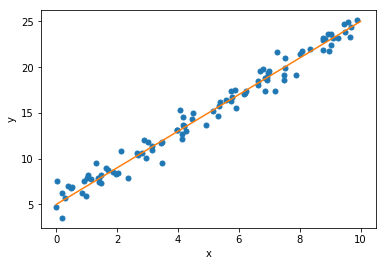

In [8]:
# Plot out data
plt.figure
plt.plot(x, y, "o", ms=5) # ms = markersize
# Values for plotting the regression function
xx = np.array([0, 10]) # the range of x: 0 to 10
plt.plot(xx, beta_0 + beta_1 * xx) # this is the deterministic part of the model, the part without the noise/ error
plt.xlabel("x")
plt.ylabel("y");

# orange line = xx vs. beta_0 + beta_1 * xx
# blue dots = x vs. y (where y has the Gaussian noise, that is why the dots are scattered around the line)

In [13]:
# Residual Sum of Squares (RSS)
def compute_rss(y_estimate, y):
    return sum(np.power(y-y_estimate, 2))
def estimate_y(x, b_0, b_1):
    return b_0 + b_1 * x
rss = compute_rss(estimate_y(x, beta_0, beta_1), y)
print(rss)

81.540007425512


In [23]:
# Least squares estimation
# assume we know the true value of beta_0 and we are trying to estimate the slope (beta_1)
rss = []
slopes = np.arange(-10, 15, 0.001)
for slope in slopes:
    # calculate the rss value for a given value of 'slope'
    rss.append(np.sum((y - beta_0 - slope * x) ** 2))
    
print(rss)

[465163.6265980302, 465086.1430283995, 465008.6659137614, 464931.1952541162, 464853.73104946373, 464776.273299804, 464698.82200513716, 464621.37716546294, 464543.9387807815, 464466.5068510928, 464389.08137639693, 464311.6623566938, 464234.2497919835, 464156.8436822659, 464079.44402754103, 464002.05082780897, 463924.6640830696, 463847.2837933231, 463769.9099585693, 463692.5425788083, 463615.18165404, 463537.82718426455, 463460.47916948184, 463383.1376096919, 463305.80250489456, 463228.4738550901, 463151.1516602785, 463073.83592045953, 462996.5266356335, 462919.2238058001, 462841.92743095936, 462764.6375111115, 462687.3540462564, 462610.0770363941, 462532.80648152455, 462455.54238164774, 462378.28473676357, 462301.0335468723, 462223.7888119739, 462146.5505320681, 462069.31870715506, 461992.0933372348, 461914.8744223074, 461837.66196237254, 461760.45595743065, 461683.2564074815, 461606.06331252505, 461528.8766725614, 461451.69648759044, 461374.52275761246, 461297.35548262706, 461220.19466

In [26]:
# find the index within 'rss' which has the lowest value (least-squares) of rss
ind_min = np.argmin(rss) # use np.argmin
print(ind_min)

12004


In [25]:
# Using the 'ind_min' index, pull out the 'slope' values that corresponds to the minimum RSS
print('Estimate for the slope: ', slopes[ind_min])

Estimate for the slope:  2.003999999993347


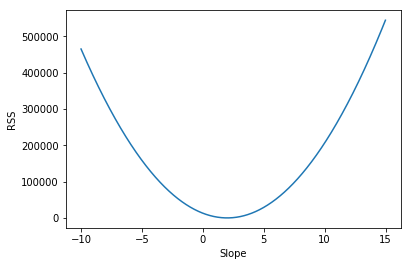

In [22]:
# Plot our data
plt.figure()
plt.plot(slopes, rss)
plt.xlabel('Slope')
plt.ylabel('RSS');

In [28]:
import statsmodels.api as sm
mod = sm.OLS(y, x) # OLS = Ordinary Least Squares
est = mod.fit() # our estimate, by fitting the model
print(est.summary()) # print a summary of our estimate from the fitted model

# x1 coefficient = 2.7569, which is very far off from the true value = 2.0
# this is because the model we fitted has no y-intercept (the constant), which means it is forced to go through (0,0), which will cause the estimated slope to be far-off

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              2974.
Date:                Mon, 18 May 2020   Prob (F-statistic):                    1.14e-75
Time:                        11:30:35   Log-Likelihood:                         -246.89
No. Observations:                 100   AIC:                                      495.8
Df Residuals:                      99   BIC:                                      498.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [30]:
X = sm.add_constant(x) # to introduce a constant using the sm.add_constant() method
mod = sm.OLS(y, X) # use the capital 'X' in this case now, which has the constant
est = mod.fit()
print(est.summary())

# we now have 2 predictors in the model - 'const' and 'x1'
# this fitted model looks better ('x1' is closer to 2.0) after the constant is added to the model

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     4115.
Date:                Mon, 18 May 2020   Prob (F-statistic):           7.47e-82
Time:                        11:39:59   Log-Likelihood:                -130.72
No. Observations:                 100   AIC:                             265.4
Df Residuals:                      98   BIC:                             270.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2370      0.174     30.041      0.0

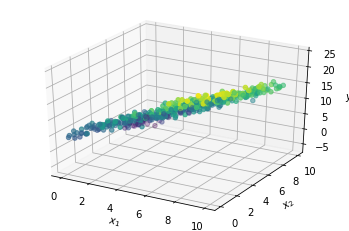

In [33]:
# Multiple Linear Regression using SciKit-Learn
n = 500
# 3 predictors in the model = 1 constant + 2 covariates
beta_0 = 5
beta_1 = 2
beta_2 = -1
np.random.seed(1)
x_1 = 10 * ss.uniform.rvs(size=n) # generate random samples from a Uniform distribution (0,1), *10 means (0, 10)
x_2 = 10 * ss.uniform.rvs(size=n)
y = beta_0 + beta_1 * x_1 + beta_2 * x_2 + ss.norm.rvs(loc=0, scale=1, size=n) # with Gaussian noise added

X = np.stack([x_1, x_2], axis=1) # we want to STACK 'x_1' and 'x_2' as a column (axis=1), use 'np.stack'

# Plot our data on a 3-D plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y, c=y)
ax.set_xlabel("$x_1$") # use LaTex $$ for 'x_1' label
ax.set_ylabel("$x_2$") # use LaTex $$ for 'x_2' label
ax.set_zlabel("$y$");

In [35]:
# Now we use scikit-learn to fit this linear model
from sklearn.linear_model import LinearRegression
lm = LinearRegression(fit_intercept=True) # fit_intercept=True cos we know there is a non-zero intercept
# fit our model 'lm'
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
# To extract the estimated value of the intercept (beta_0) of the model 'lm'
lm.intercept_

5.154077763777254

In [41]:
# To extract the estimated values of the coefficients: beta_1 and beta_2
print(lm.coef_[0]) # beta_1 (estimated value of the first coefficient - this is the closest to the true parameter, out of all 3 parameter estimates
print(lm.coef_[1]) # beta_2 (estimated value of the second coefficient)

1.9999378989891399
-1.020264486993336


In [47]:
X_0 = np.array([2, 4]) # this is a single data point (single sample)
#lm.predict(X_0) # this will give a warning, you will need to reshape your data
lm.predict(X_0.reshape(1, -1)) # use 'reshape(-1,1)' if data has a single feature, or use 'reshape(1, -1)' if data is a single sample (which is our case)
# this is the predicted output

array([5.07289561])

In [48]:
# Find the score - r-squared statistic - to find out how well the model works
lm.score(X, y)
# we get a very high r-squared value (unusually high)

0.9798997316600129

In [50]:
# Assessing model accuracy
from sklearn.model_selection import train_test_split # this is the function we will use to SPLIT a data into TRAINING and TEST data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=1) # 'train_size': proportion of data that will go to the TRAINING data set, 'random_state': this is the random seed
lm = LinearRegression(fit_intercept=True)
lm.fit(X_train, y_train) # fitting the model to the Training data
lm.score(X_test, y_test) # check how well the model fits, note that this has to be done on the Test data (not Training data), using the r-squared statistic
# very high r-squared statistic = model is a very good fit

0.9794930834681773

In [51]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib notebook

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [52]:
# Generate 4 random vectors
# create some placeholders
h = 1
sd = 1
n = 50

x1 = ss.norm.rvs(-h, sd, n) # generate a vector 'x1' from a normal distribution, '-h' distance from the origin (first class of data)
y1 = ss.norm.rvs(0, sd, n) # outcome

x2 = ss.norm.rvs(h, sd, n) # generate a vector 'x2' from a normal distribution, 'h' distance from the origin
y2 = ss.norm.rvs(0, sd, n) # outcome

In [55]:
# Make the above into a function
h = 1
sd = 1
n = 50

def gen_data(n, h, sd1, sd2):
    x1 = ss.norm.rvs(-h, sd1, n)
    y1 = ss.norm.rvs(0, sd1, n)
    x2 = ss.norm.rvs(h, sd2, n)
    y2 = ss.norm.rvs(0, sd2, n)
    return (x1, y1, x2, y2)

In [58]:
(x1, y1, x2, y2) = gen_data(50, 1, 1, 1.5)

In [59]:
(x1, y1, x2, y2) = gen_data(1000, 1.5, 1, 1.5)

# gen_data(1000, 20, .5, .5): generates data that is EASIEST to classify correctly
# gen_data(1000, 0, 1, 1): generates data that is HARDEST to classify correctly

In [63]:
# Plot the data
def plot_data(x1, y1, x2, y2):
    plt.figure() # open a new figure
    plt.plot(x1, y1, "o", ms=2)
    plt.plot(x2, y2, "o", ms=2)
    plt.xlabel("$X_1$") # in LaTex, the '_' turns the '1' into a subscript
    plt.ylabel("$X_2$") # in LaTex, the '_' turns the '2' into a subscript

<IPython.core.display.Javascript object>


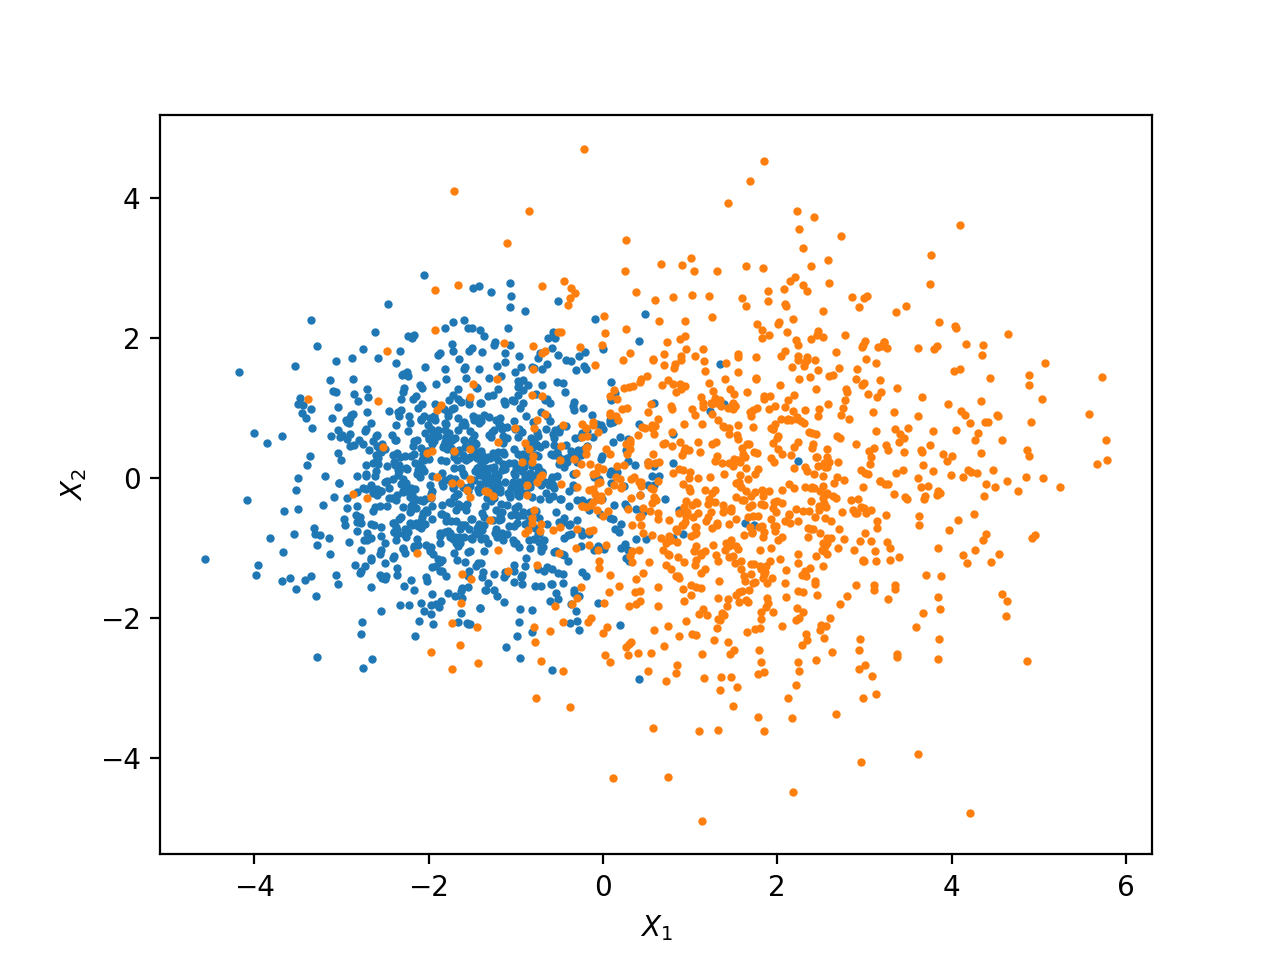

In [62]:
plot_data(x1, y1, x2, y2)
# the blue points on the left = observations coming from Class 1 (-h distance)
# the orange points on the right = observations coming from Class 2 (h distance)
# the orange cloud is BROADER than the blue cloud: cos sd2 is 1.5, which is larger than sd1 = 1

In [66]:
# Convert probability to odds
def prob_to_odds(p):
    if p <= 0 or p >= 1:
        print("Probabilities must be between 0 and 1.")
    return p / (1-p)

prob_to_odds(0.8)

4.000000000000001

In [73]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

# Prepare the X-vector and Y-vector
# x1, y2, x2, y2 came from gen_data() (above)
#np.vstack((x1, y1)).shape # this gives 2 rows and 1000 columns, which is the wrong shape - we want the TRANSPOSE of this
print(np.vstack((x1, y1)).T.shape) # this gives 1000 rows and 2 columns, which is now correct
# np.vstack stacks 'x1' and 'y1' vectors together (merging side-by-side)

(1000, 2)


In [80]:
X = np.vstack((np.vstack((x1, y1)).T, np.vstack((x2, y2)).T)) # Finally, X-vector is a vstack of the tuple from x1,y1 and x2, y2
X.shape
# 1000 observations from each class = 2000 observations (rows) in total
# 2 columns cos first column is the x1 and x2; second column is y1 and y2

(2000, 2)

In [87]:
n = 1000
y = np.hstack((np.repeat(1,n), np.repeat(2,n))) # we want n outcomes from Class 1 and n outcomes from Class 2
y.shape # y-vector has the same number of rows as X-vector

(2000,)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1000, 2)
(1000, 2)
(1000,)
(1000,)


In [89]:
clf.fit(X_train, y_train) # fit the 'clf' model using the Training data set

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
clf.score(X_test, y_test) # check score (r-squared statistic) on the Test data set
# we get a very high r-squared statistic (model is a good fit)

0.896

In [94]:
#clf.predict_proba(np.array([-2, 0])) # this will give an error due to the shape of the numpy array
clf.predict_proba(np.array([-2, 0]).reshape(1,-1)) # use X.reshape(-1,1) if your data has a single feature, or use X.reshape(1,-1) if your data is a single data point (which is our case)
# the probabilities of Class 1 and Class 2 will be returned
# 0.97 probability that this particular Test point (-2,0) array belongs to Class 1
# 0.03 probability that this particular Test point (-2, 0) array belongs to Class 2
# These 2 probabilities will add up to 1

array([[0.96826807, 0.03173193]])

In [95]:
clf.predict(np.array([-2, 0]).reshape(1,-1)) # returns the prediction for the Test point (-2, 0)
# This means this Test data point (-2, 0) is predicted to be from Class 1

array([1])

In [4]:
# Plot the predictive probabilities
def plot_probs(ax, clf, class_no):
    # use np.meshgrid to generate two x-matrices (xx1 and xx2), where xx1 = all the x1 points, xx2 = all the x2 points
    xx1, xx2 = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
    # use 'ravel()' to put all the xx1 values into a single row, same for xx2
    # we then use np.stack (axis=1) to stack xx1 on top of xx2 vectors (this is now a 2-rowed array)
    # clf.predict_proba gives a n-rows, 2 columns of probabilities values
    probs = clf.predict_proba(np.stack((xx1.ravel(), xx2.ravel()), axis=1))
    # we only want to extract the probabilities of the "class_no" we want, it can be class_no=1 or class_no=2
    # 'Z' will be a n-rows, 1 column of probabilities values (the one we indicated as our 'class_no' of interest - conditional class probabilites)
    Z = probs[:,class_no]
    # turn Z into xx1's (or xx2's) shape
    Z = Z.reshape(xx1.shape)
    # plot values of Z at locations specified by xx1 and xx2 only
    CS = ax.contourf(xx1, xx2, Z)
    cbar = plt.colorbar(CS)
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")

<IPython.core.display.Javascript object>


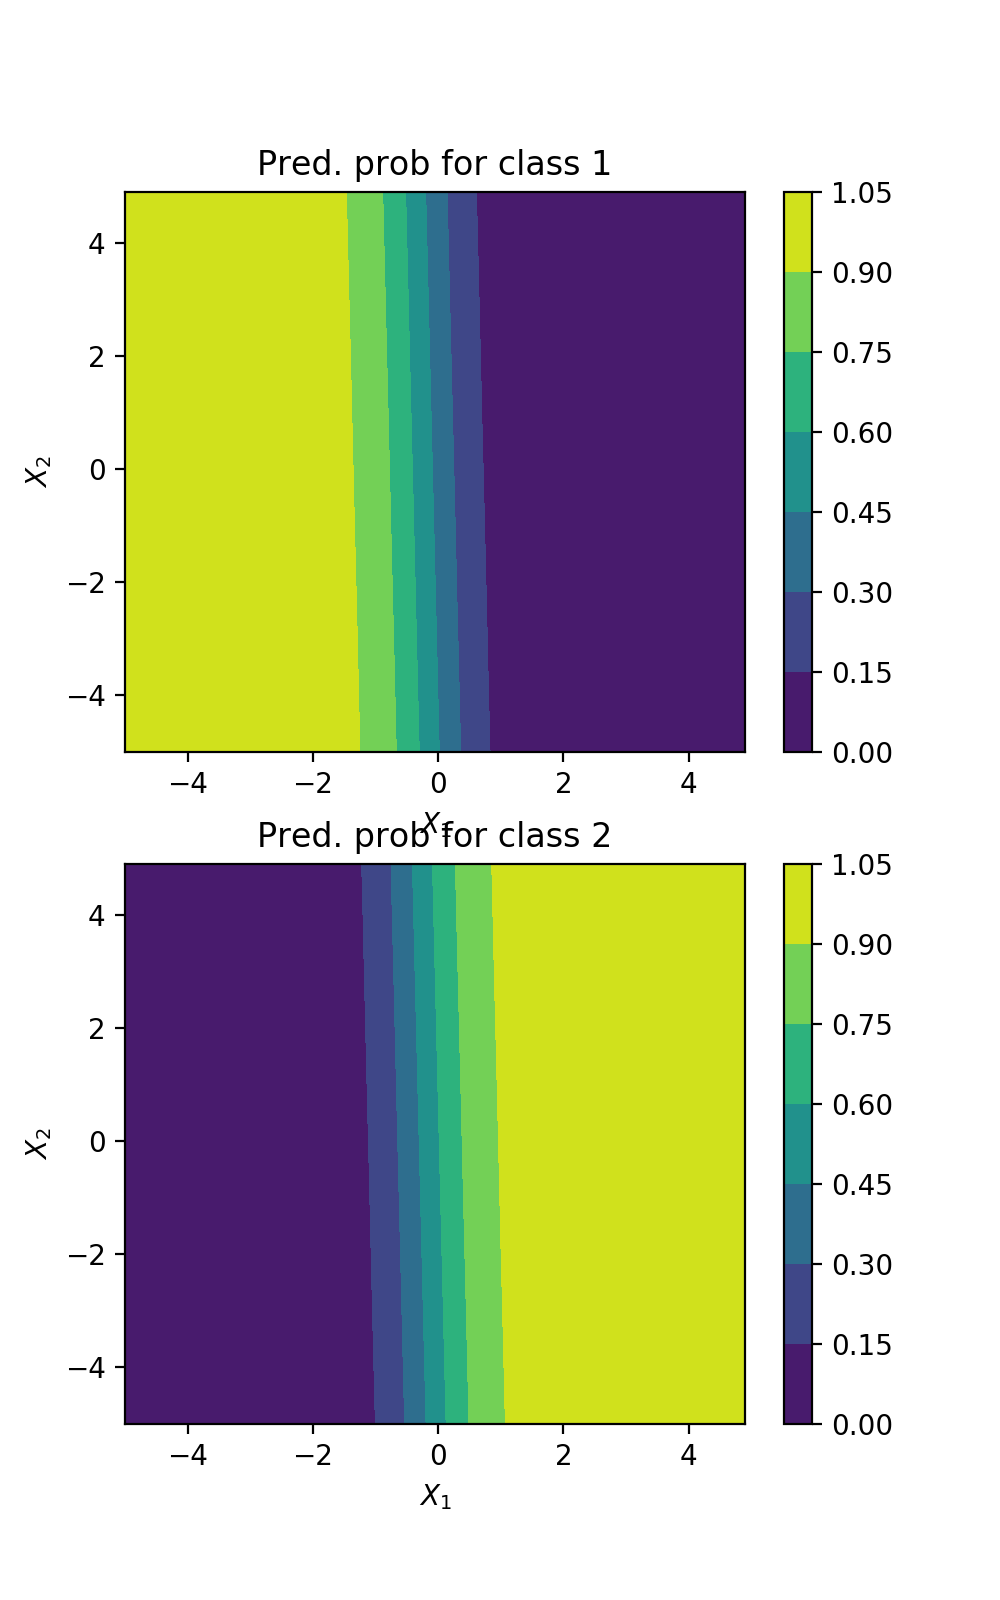

In [99]:
plt.figure(figsize=(5,8))
ax = plt.subplot(211)
plot_probs(ax, clf, 0) # call the function for class_no = 0 (Class 1)
plt.title("Pred. prob for class 1")
ax = plt.subplot(212)
plot_probs(ax, clf, 1) # call the function for class_no = 1 (Class 2)
plt.title("Pred. prob for class 2");

In [100]:
# for Random Forest REGRESSION
from sklearn.ensemble import RandomForestRegressor

# for Random Forest CLASSIFICATION
from sklearn.ensemble import RandomForestClassifier

# after importing the relevant model, everything proceeds in the same way as for linear and logistic regression